In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
data = pd.read_csv("/content/drive/My Drive/Trabajo de Grado/Tesis/Pruebas/Multicriterio/Datasets/datos_predichosARBOL.csv")
#data = pd.read_csv("/content/drive/My Drive/Trabajo de Grado/Tesis/Pruebas/Multicriterio/Datasets/datos_predichos_equilibrados.csv")
data.head(10)

,Promedio Temperatura,Promedio Humedad,Promedio CO2,Promedio TVCO,Suma,Alerta predicha
0,0.440205,0.168472,0.074892,0.015264,0.698834,Muy Alto
1,0.113952,0.180013,0.135815,0.080880,0.510661,Alto
2,0.366971,0.165835,0.012062,0.067152,0.612020,Alto
3,0.375294,0.131329,0.001785,0.034272,0.542679,Alto
4,0.418682,0.071505,0.088985,0.045456,0.624627,Muy Alto
5,0.412423,0.160093,0.007508,0.098880,0.678903,Muy Alto
6,0.139181,0.072855,0.020554,0.020400,0.252990,Medio
7,0.383324,0.151435,0.101354,0.045888,0.682001,Muy Alto
8,0.031479,0.229062,0.104431,0.095904,0.460876,Alto
9,0.330314,0.059820,0.152985,0.048864,0.591983,Alto


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Promedio Temperatura  10000 non-null  float64
 1   Promedio Humedad      10000 non-null  float64
 2   Promedio CO2          10000 non-null  float64
 3   Promedio TVCO         10000 non-null  float64
 4   Suma                  10000 non-null  float64
 5   Alerta predicha       10000 non-null  object 
dtypes: float64(5), object(1)
memory usage: 468.9+ KB


In [23]:
# Variables predictoras
# X = data.iloc[:,0:5]
X = data.iloc[:,0:4]

# Variable a predecir
Y = data.iloc[:,5]

X.head()

,Promedio Temperatura,Promedio Humedad,Promedio CO2,Promedio TVCO
0,0.440205,0.168472,0.074892,0.015264
1,0.113952,0.180013,0.135815,0.080880
2,0.366971,0.165835,0.012062,0.067152
3,0.375294,0.131329,0.001785,0.034272
4,0.418682,0.071505,0.088985,0.045456


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 399 to 7270
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Promedio Temperatura  2000 non-null   float64
 1   Promedio Humedad      2000 non-null   float64
 2   Promedio CO2          2000 non-null   float64
 3   Promedio TVCO         2000 non-null   float64
dtypes: float64(4)
memory usage: 78.1 KB


In [14]:
pip install micromlgen

  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32152 sha256=cc36ee2b08e15d019e54375d08133f8a6f42a2ac42431c9eabea05f6d29aef6a
  Stored in directory: /root/.cache/pip/wheels/97/54/64/5d82c310920abe1be0d120313ceb9e12c88f5701f53f6ed248
Successfully built micromlgen


In [25]:
from sklearn.tree import DecisionTreeClassifier
from micromlgen import port

arbol = DecisionTreeClassifier(max_depth=5)

arbol_varroa = arbol.fit(X_train, Y_train)

# Imprimir el código C++ para microcontroladores
print(port(arbol_varroa))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[0] <= 0.2882256507873535) {
                            if (x[0] <= 0.12305671349167824) {
                                if (x[1] <= 0.12824025005102158) {
                                    if (x[0] <= 0.027858479879796505) {
                                        if (x[1] <= 0.03273533098399639) {
                                            return 1;
                                        }

                                        else {
                                            return 2;
                                        }
                                    }

                                    else {
                                        if

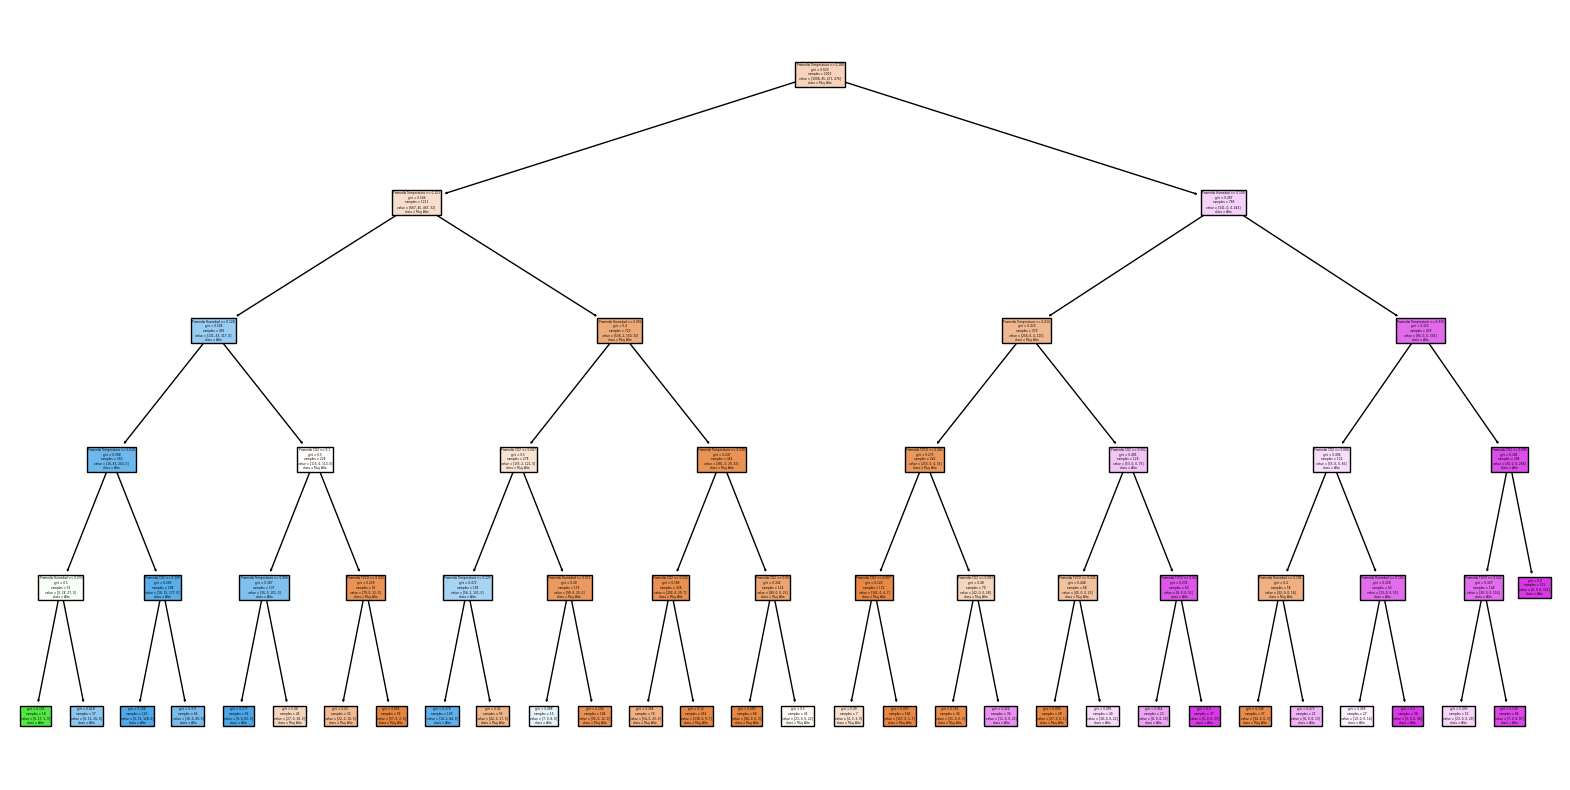

In [26]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(20,10))
tree.plot_tree(arbol_varroa, feature_names=list(X.columns.values), class_names=list(Y.values), filled=True)
plt.show()

In [27]:
Y_pred = arbol_varroa.predict(X_test)

Y_pred

array(['Medio', 'Muy Alto', 'Muy Alto', ..., 'Alto', 'Medio', 'Medio'],
      dtype=object)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
matriz = confusion_matrix(Y_test, Y_pred)
matriz

array([[3192,    0,  258,  409],
       [   0,   33,  150,    0],
       [ 440,   24, 1489,    0],
       [ 244,    0,    0, 1761]])

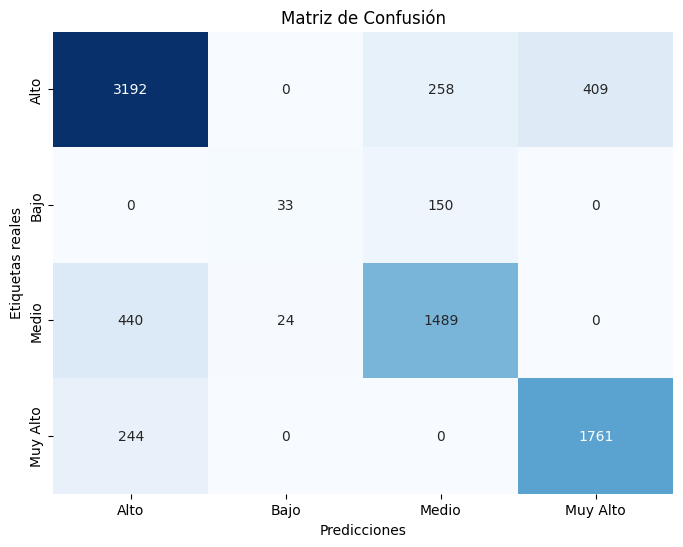

In [29]:
# Etiquetas de las clases
class_names = ['Alto', 'Bajo', 'Medio', 'Muy Alto']

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

In [30]:
# Calcular la exactitud (Accuracy)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Exactitud (Accuracy): {accuracy}")

# Reporte de Clasificación (precision, recall, f1-score)
reporte_clasificacion = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(reporte_clasificacion)

matriz

Exactitud (Accuracy): 0.809375
Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.82      0.83      0.83      3859
        Bajo       0.58      0.18      0.28       183
       Medio       0.78      0.76      0.77      1953
    Muy Alto       0.81      0.88      0.84      2005

    accuracy                           0.81      8000
   macro avg       0.75      0.66      0.68      8000
weighted avg       0.81      0.81      0.80      8000



array([[3192,    0,  258,  409],
       [   0,   33,  150,    0],
       [ 440,   24, 1489,    0],
       [ 244,    0,    0, 1761]])